In [1]:
# Imports and Setup

import numpy as np
import pandas as pd
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d as smooth

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 14, 10
plt.rcParams['lines.linewidth'] = 1.5

font = {'weight' : 'normal',
      'size'   : 15}

plt.rc('font', **font)

from fair_inverse_model import co2_conc_total as rf_to_conc
from fair_inverse_model import annual_emissions_calc2 as conc_to_emissions
from forward_multiple_GHG import fair_scm as FAIR_model

In [2]:
#import emissions and RF data from file

datafile = 'RCP3PD'

emms_file = './RCPs/' + datafile + '_EMISSIONS.csv'
emms_data = np.genfromtxt(emms_file,skip_header=36,delimiter=',',names=True)

emissions = emms_data['FossilCO2'] + emms_data['OtherCO2']
M_emissions = emms_data['CH4']
N_emissions = emms_data['N2O'] * 44.0 / 28.0

forc_file = './RCPs/'+datafile+'_MIDYEAR_RADFORCING.csv'
forc_data = np.genfromtxt(forc_file,skip_header=58,delimiter=',',names=True)
other_rf = forc_data['TOTAL_ANTHRO_RF'] - forc_data['CO2_RF'] - forc_data['CH4_RF'] - forc_data['N2O_RF']

In [3]:
#import piers data for total anthro RF

rf_anthro_piers = np.loadtxt("rf_a_reord.txt")
rf_anthro_piers = rf_anthro_piers.reshape((200,267))

#import median data anthro forcing from richard
rf_comps_median = np.loadtxt("Annualforcings_Mar2014_GHGrevised.txt", skiprows=4)

#sum components of file to make total...
rf_anthro_median = rf_comps_median[:,1] + rf_comps_median[:,2] + rf_comps_median[:,3] + rf_comps_median[:,4] +  rf_comps_median[:,6] + rf_comps_median[:,7] + rf_comps_median[:,8] + rf_comps_median[:,9] + rf_comps_median[:,10]  
rf_other_median = rf_comps_median[:,13] - rf_comps_median[:,14]
rf_total_median = rf_comps_median[:,13]

y_0 = int(rf_comps_median[0,0])
time = rf_comps_median[:,0] 

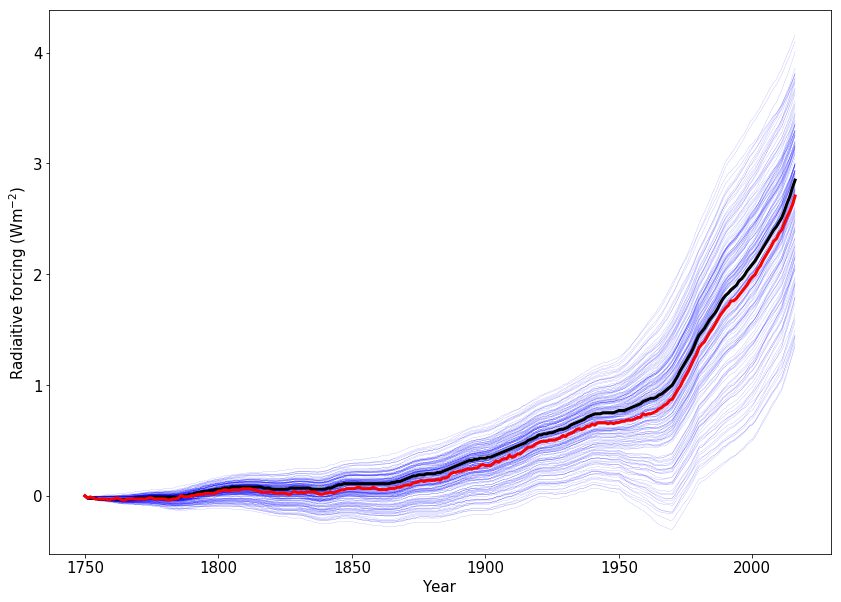

In [4]:
for i in range(0,rf_anthro_piers.shape[0]):
    plt.plot(time, rf_anthro_piers[i], color = 'blue', linewidth = 0.1)
    
plt.plot(time, rf_anthro_piers[99], color = 'black', linewidth = 3)
plt.plot(time, rf_anthro_median, color = 'red', linewidth = 3)
plt.xlabel('Year')
plt.ylabel('Radiaitive forcing (Wm$^{-2}$)')

In [5]:
out_anthro_historical = FAIR_model(other_rf=rf_anthro_median,MAGICC_model = True)
temp_anthro_historical = out_anthro_historical['temperature']
co2_conc_anthro_historical = rf_to_conc(rf_anthro_median)
anthro_historical_co2_fe_ems = conc_to_emissions(co2_conc_anthro_historical,temp_anthro_historical, year_smoothing = 0) * 44./12.     

out_co2_historical = FAIR_model(other_rf=rf_comps_median[:,1],MAGICC_model = True)
temp_co2_historical = out_co2_historical['temperature']
co2_conc_historical = rf_to_conc(rf_comps_median[:,1])
historical_co2_fe_ems = conc_to_emissions(co2_conc_historical,temp_co2_historical, year_smoothing = 0) * 44./12. 

#cumulative sum of annual co2-fe emissions to get cumulative emissions
cumulative_anthro_historical_co2_fe_ems = np.cumsum(anthro_historical_co2_fe_ems)
cumulative_historical_co2_ems = np.cumsum(historical_co2_fe_ems)
#dont include before 1870
cumulative_historical_co2_ems_2 = np.cumsum(historical_co2_fe_ems[1870-y_0:])
cumulative_anthro_historical_co2_fe_ems_2 = np.cumsum(anthro_historical_co2_fe_ems[1870-y_0:])

print 'NOTE: no smoothing done on radiative forcing \n'

print 'Cumulative total anthropogenic CO2-fe emissions 1750-2016 inclusive:', cumulative_anthro_historical_co2_fe_ems[2016-y_0]*12./44., 'GtC'
print 'Cumulative total anthropogenic CO2-fe emissions 1870-2016 inclusive:', cumulative_anthro_historical_co2_fe_ems_2[2016-1870]*12./44., 'GtC'
print 'Cumulative total anthropogenic CO2-fe emissions 1870-2011 inclusive:', cumulative_anthro_historical_co2_fe_ems_2[2011-1870]*12./44., 'GtC'
print 'Cumulative CO2 (all sources?) emissions 1750-2016 inclusive:', cumulative_historical_co2_ems[2016-y_0]*12./44., 'GtC'
print 'Cumulative CO2 (all sources?) emissions 1870-2016 inclusive:', cumulative_historical_co2_ems_2[2016-1870]*12./44., 'GtC'
print 'Cumulative CO2 (all sources?) emissions 1870-2011 inclusive:', cumulative_historical_co2_ems_2[2011-1870]*12./44., 'GtC'

NOTE: no smoothing done on radiative forcing 

Cumulative total anthropogenic CO2-fe emissions 1750-2016 inclusive: 908.268942715 GtC
Cumulative total anthropogenic CO2-fe emissions 1870-2016 inclusive: 901.443455905 GtC
Cumulative total anthropogenic CO2-fe emissions 1870-2011 inclusive: 694.944150492 GtC
Cumulative CO2 (all sources?) emissions 1750-2016 inclusive: 687.957818835 GtC
Cumulative CO2 (all sources?) emissions 1870-2016 inclusive: 642.302225995 GtC
Cumulative CO2 (all sources?) emissions 1870-2011 inclusive: 494.047413158 GtC


NOTE: no smoothing done on radiative forcing 

Cumulative total anthropogenic CO2-fe emissions 1750-2016 inclusive: 866.368840649 GtC
Cumulative total anthropogenic CO2-fe emissions 1870-2016 inclusive: 840.282319386 GtC
Cumulative total anthropogenic CO2-fe emissions 1870-2011 inclusive: 738.337266062 GtC
Cumulative total anthropogenic CO2-fe emissions 1750-2016 inclusive: 3176.68574905 GtCO2
Cumulative total anthropogenic CO2-fe emissions 1870-2016 inclusive: 3081.03517108 GtCO2
Cumulative total anthropogenic CO2-fe emissions 1870-2011 inclusive: 2707.23664223 GtCO2
Cumulative CO2 emissions 1750-2016 inclusive: 655.907242794 GtC
Cumulative CO2 emissions 1870-2016 inclusive: 595.981289361 GtC
Cumulative CO2 emissions 1870-2011 inclusive: 528.059079531 GtC
Cumulative CO2 emissions 1750-2016 inclusive: 2404.99322358 GtCO2
Cumulative CO2 emissions 1870-2016 inclusive: 2185.26472766 GtCO2
Cumulative CO2 emissions 1870-2011 inclusive: 1936.21662495 GtCO2


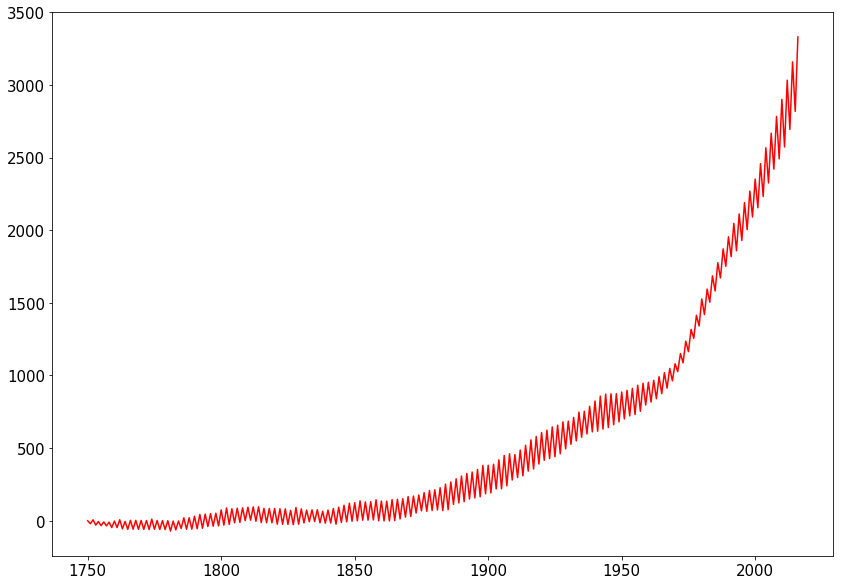

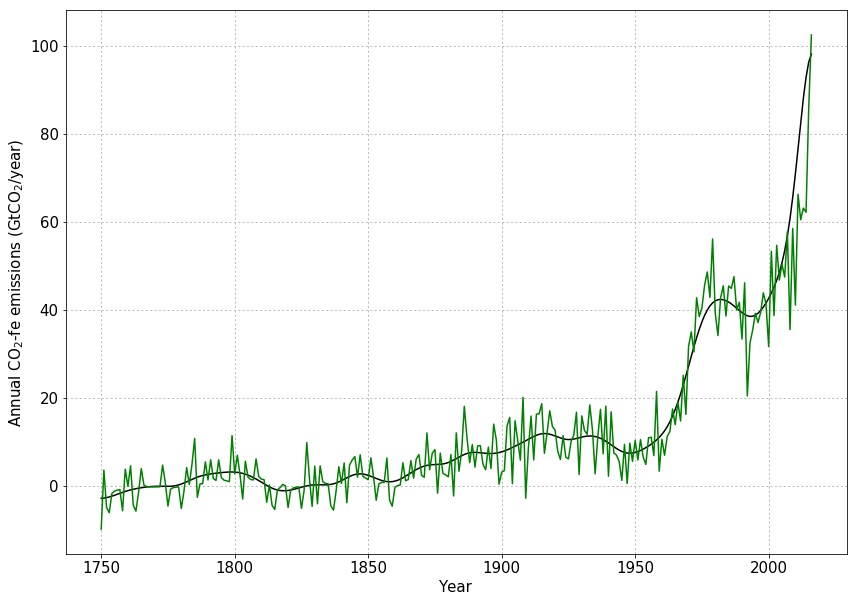

In [6]:
plt.plot(time, cumulative_anthro_historical_co2_fe_ems, color = 'red')

plt.figure()
#plt.plot(time, anthro_historical_co2_fe_ems, color = 'red')
plt.plot(time, smooth(anthro_historical_co2_fe_ems,5), color = 'black')

two_ts_removed_anthro = np.zeros(anthro_historical_co2_fe_ems.size)
two_ts_removed_anthro[anthro_historical_co2_fe_ems.size-1] = anthro_historical_co2_fe_ems[anthro_historical_co2_fe_ems.size-1]/5
for i in range(0, anthro_historical_co2_fe_ems.size-1):
    two_ts_removed_anthro[i] = (anthro_historical_co2_fe_ems[i+1] + anthro_historical_co2_fe_ems[i])/2 

plt.plot(time, two_ts_removed_anthro, color = 'green')
plt.xlabel('Year')
plt.ylabel('Annual CO$_2$-fe emissions (GtCO$_2$/year)')
plt.grid(True, linestyle = ':')
#plt.savefig('anthro_annual_ems')

print 'NOTE: no smoothing done on radiative forcing \n'
cum_sum_anthro = np.cumsum(two_ts_removed_anthro)
#dont include before 1870
cum_sum_anthro_2 = np.cumsum(two_ts_removed_anthro[1870-y_0:])

print 'Cumulative total anthropogenic CO2-fe emissions 1750-2016 inclusive:', cum_sum_anthro[2016-y_0]*12./44., 'GtC'
print 'Cumulative total anthropogenic CO2-fe emissions 1870-2016 inclusive:', cum_sum_anthro_2[2016-1870]*12./44., 'GtC'
print 'Cumulative total anthropogenic CO2-fe emissions 1870-2011 inclusive:', cum_sum_anthro_2[2011-1870]*12./44., 'GtC'
print 'Cumulative total anthropogenic CO2-fe emissions 1750-2016 inclusive:', cum_sum_anthro[2016-y_0], 'GtCO2'
print 'Cumulative total anthropogenic CO2-fe emissions 1870-2016 inclusive:', cum_sum_anthro_2[2016-1870], 'GtCO2'
print 'Cumulative total anthropogenic CO2-fe emissions 1870-2011 inclusive:', cum_sum_anthro_2[2011-1870], 'GtCO2'

#-----------------

two_ts_removed_co2 = np.zeros(historical_co2_fe_ems.size)
two_ts_removed_co2[historical_co2_fe_ems.size-1] = historical_co2_fe_ems[historical_co2_fe_ems.size-1]/5
for i in range(0, historical_co2_fe_ems.size-1):
    two_ts_removed_co2[i] = (historical_co2_fe_ems[i+1] + historical_co2_fe_ems[i])/2
    
cum_sum_co2 = np.cumsum(two_ts_removed_co2)
#dont include before 1870
cum_sum_co2_2 = np.cumsum(two_ts_removed_co2[1870-y_0:])

print 'Cumulative CO2 emissions 1750-2016 inclusive:', cum_sum_co2[2016-y_0]*12./44., 'GtC'
print 'Cumulative CO2 emissions 1870-2016 inclusive:', cum_sum_co2_2[2016-1870]*12./44., 'GtC'
print 'Cumulative CO2 emissions 1870-2011 inclusive:', cum_sum_co2_2[2011-1870]*12./44., 'GtC'
print 'Cumulative CO2 emissions 1750-2016 inclusive:', cum_sum_co2[2016-y_0], 'GtCO2'
print 'Cumulative CO2 emissions 1870-2016 inclusive:', cum_sum_co2_2[2016-1870], 'GtCO2'
print 'Cumulative CO2 emissions 1870-2011 inclusive:', cum_sum_co2_2[2011-1870], 'GtCO2'

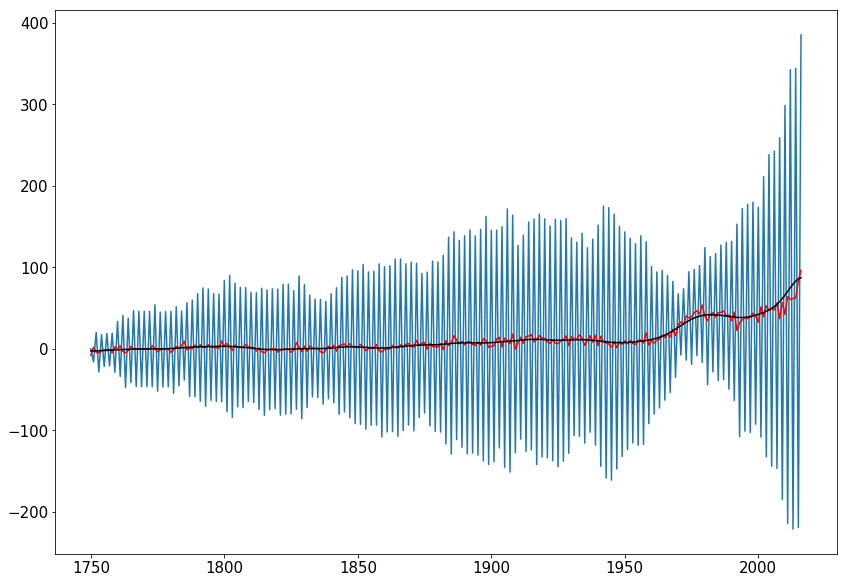

In [7]:
from fair_inverse_model import annual_emissions_calc as conc_to_emissions_myles

myles_anthro_ems = conc_to_emissions_myles(co2_conc_anthro_historical,temp_anthro_historical)

plt.plot(time, myles_anthro_ems*44./12.)

myles_anthro_ems_av = np.zeros(myles_anthro_ems.size)
myles_anthro_ems_av[myles_anthro_ems_av.size-1] = myles_anthro_ems[myles_anthro_ems.size-1]/4
for j in range(0, myles_anthro_ems.size-1):
    myles_anthro_ems_av[j] = (myles_anthro_ems[j+1] + myles_anthro_ems[j])/2
    
plt.plot(time, myles_anthro_ems_av*44./12., color = 'red')
plt.plot(time, smooth(myles_anthro_ems*44./12.,5), color = 'black')

Cumulative CO2 emissions 1750-2016 inclusive: 585.520905385 GtC
Cumulative CO2 emissions 1870-2016 inclusive: 535.505661969 GtC
Cumulative CO2 emissions 1870-2011 inclusive: 476.303224752 GtC
Cumulative CO2 emissions 1750-2016 inclusive: 585.520905385 GtC
Cumulative CO2 emissions 1870-2016 inclusive: 535.294797987 GtC
Cumulative CO2 emissions 1870-2011 inclusive: 481.694866737 GtC


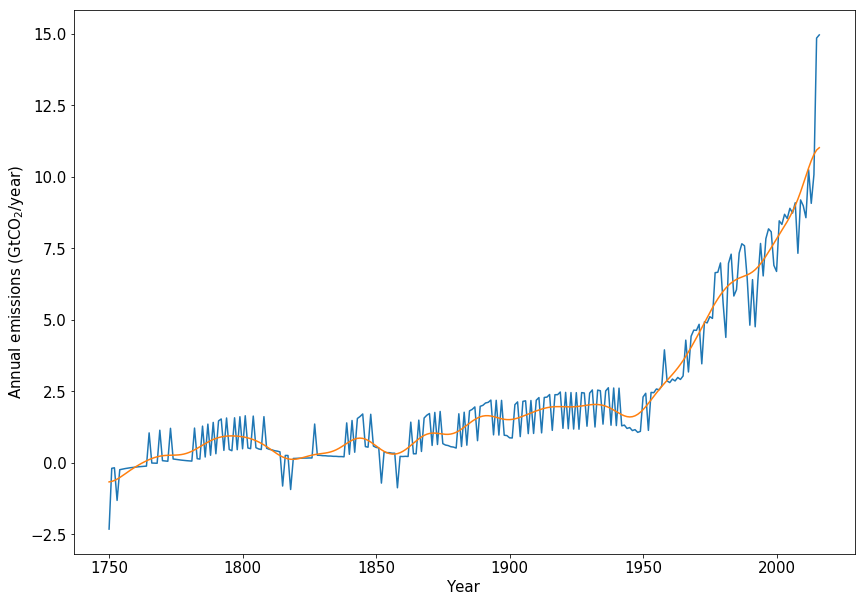

In [8]:
#magicc tuned params CO2 total carbon 1870-2011

C_0 = 279.51
F_2x= 3.71
a = np.array([0.05,0.236489403703,0.3,0.413510596297])
r0 = 39.1193644809
rC=0.0152
rT=3.332

out_anthro_historical = FAIR_model(other_rf=rf_comps_median[:,1],MAGICC_model = True,F_2x= F_2x, C_0=C_0,a = a,r0 = r0,rC=rC,rT=rT)
temp_anthro_historical = out_anthro_historical['temperature']
co2_conc_anthro_historical = rf_to_conc(rf_comps_median[:,1], a = F_2x/np.log(2) , Cpreind = C_0)
anthro_historical_co2_fe_ems = conc_to_emissions(co2_conc_anthro_historical,temp_anthro_historical, year_smoothing = 0,pool_splits=a,r0=r0,rC=rC,rT=rT,Cpreind = C_0) 

two_ts_removed_anthro = np.zeros(anthro_historical_co2_fe_ems.size)
two_ts_removed_anthro[anthro_historical_co2_fe_ems.size-1] = anthro_historical_co2_fe_ems[anthro_historical_co2_fe_ems.size-1]/5
for i in range(0, anthro_historical_co2_fe_ems.size-1):
    two_ts_removed_anthro[i] = (anthro_historical_co2_fe_ems[i+1] + anthro_historical_co2_fe_ems[i])/2
    
smoothed_anthro_magicc = smooth(two_ts_removed_anthro,5)

plt.plot(time, two_ts_removed_anthro)
plt.plot(time, smoothed_anthro_magicc)

cum_sum_anthro_magicc = np.cumsum(two_ts_removed_anthro)
cum_sum_anthro_smoothed_magicc = np.cumsum(smoothed_anthro_magicc)
#not before 1870...
cum_sum_anthro_magicc_2 = np.cumsum(two_ts_removed_anthro[1870-y_0:])
cum_sum_anthro_smoothed_magicc_2 = np.cumsum(smoothed_anthro_magicc[1870-y_0:])

print 'Cumulative CO2 emissions 1750-2016 inclusive:', cum_sum_anthro_magicc[2016-y_0], 'GtC'
print 'Cumulative CO2 emissions 1870-2016 inclusive:', cum_sum_anthro_magicc_2[2016-1870], 'GtC'
print 'Cumulative CO2 emissions 1870-2011 inclusive:', cum_sum_anthro_magicc_2[2011-1870], 'GtC'
print 'Cumulative CO2 emissions 1750-2016 inclusive:', cum_sum_anthro_smoothed_magicc[2016-y_0], 'GtC'
print 'Cumulative CO2 emissions 1870-2016 inclusive:', cum_sum_anthro_smoothed_magicc_2[2016-1870], 'GtC'
print 'Cumulative CO2 emissions 1870-2011 inclusive:', cum_sum_anthro_smoothed_magicc_2[2011-1870], 'GtC'   
    
#smooth the RF stage and run through???
#or at least explain that I am not currently doing that and the effect of doing such is to add a small quantity to predicted emissions

plt.xlabel('Year')
plt.ylabel('Annual emissions (GtCO$_2$/year)')

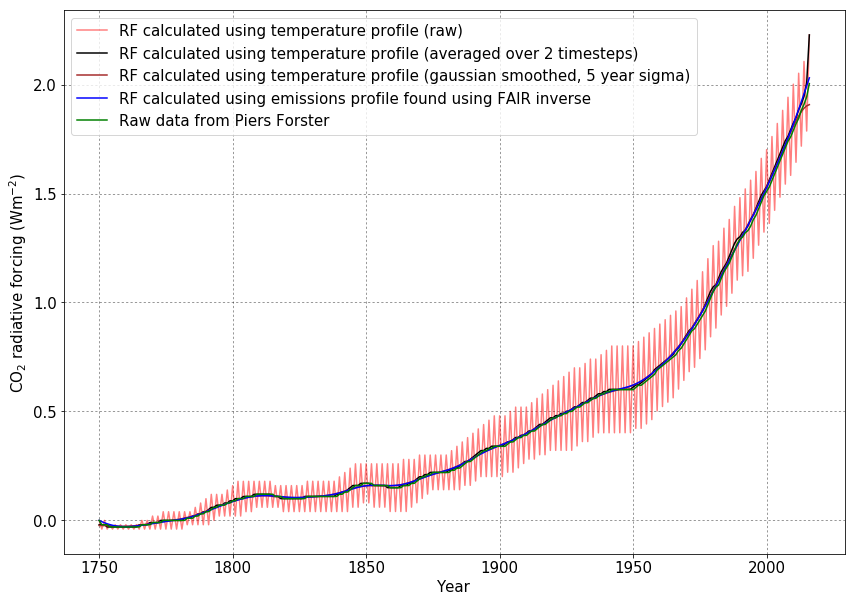

In [27]:
from fair_inverse_model import co2_forcing_2 as temp_to_rf

tcrecs = np.array([1.6,2.75])

out_anthro_historical = FAIR_model(emissions = smoothed_anthro_magicc,MAGICC_model = True,F_2x= F_2x, C_0=C_0,a = a,r0 = r0,rC=rC,rT=rT)

RF = temp_to_rf(temp_anthro_historical, tcrecs = tcrecs, F_2x = F_2x)
RF_2_ts = np.zeros(RF.size)
RF_2_ts[RF.size-1] = RF[RF.size-1]
for i in range(0, RF_2_ts.size-1):
    RF_2_ts[i] = (RF[i+1] + RF[i])/2

plt.plot(time, RF, color = 'red', alpha = 0.5, label = 'RF calculated using temperature profile (raw)')
plt.plot(time, RF_2_ts, color = 'black', linewidth = 1.5, label = 'RF calculated using temperature profile (averaged over 2 timesteps)')
plt.plot(time, smooth(RF,5), color = 'brown', linewidth = 1.5, label = 'RF calculated using temperature profile (gaussian smoothed, 5 year sigma)')
plt.plot(time, out_anthro_historical['forcing']['total'], color = 'blue', linewidth = 1.5, label = 'RF calculated using emissions profile found using FAIR inverse')
plt.plot(time, rf_comps_median[:,1], color = 'green', linewidth = 1.5, label = 'Raw data from Piers Forster')

plt.xlabel('Year')
plt.ylabel('CO$_2$ radiative forcing (Wm$^{-2}$)')
plt.grid(True, linestyle = ':', color = 'black', alpha = 0.5)
plt.legend(loc = 'upper left', fontsize = 15)

#plt.savefig('radiative-forcing-tests-co2')